In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img1 = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Computer-Vision-with-Python/DATA/dog_backpack.png"),cv2.COLOR_BGR2RGB)
img2 = cv2.resize(cv2.cvtColor(cv2.imread("/content/drive/MyDrive/Computer-Vision-with-Python/DATA/watermark_no_copy.png"),cv2.COLOR_BGR2RGB),(600,600))

In [16]:
y_offset,y_end = img1.shape[0]-img2.shape[0],img1.shape[0]
x_offset,x_end = img1.shape[1]-img2.shape[1],img1.shape[1]

In [17]:
roi = img1[y_offset:y_end, x_offset:x_end]

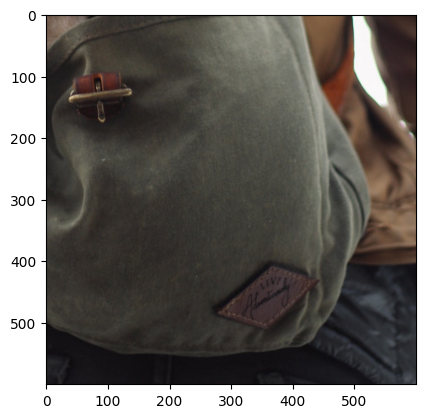

In [18]:
plt.imshow(roi)

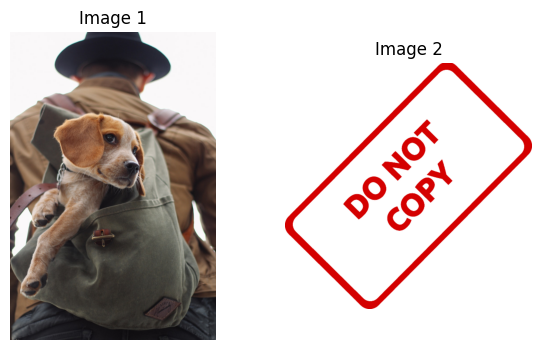

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7,4))

ax[0].imshow(img1)
ax[0].set_title("Image 1")
ax[0].axis("off")

ax[1].imshow(img2)
ax[1].set_title("Image 2")
ax[1].axis("off")

plt.show()


In [7]:
black_img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

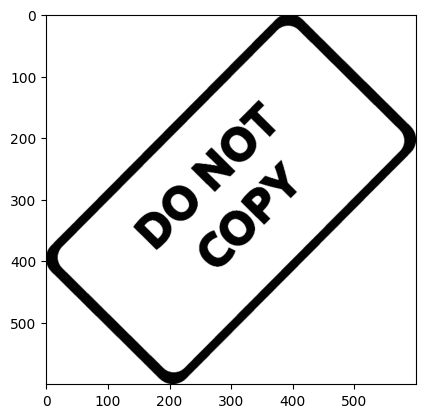

In [9]:
plt.imshow(black_img2, cmap = "gray")

In [11]:
mask_inv = cv2.bitwise_not(black_img2)

In [10]:
white_background =  np.full(black_img2.shape, 255, dtype= np.int8)

In [12]:
back_ground_img = cv2.bitwise_or(white_background,white_background,mask= mask_inv)

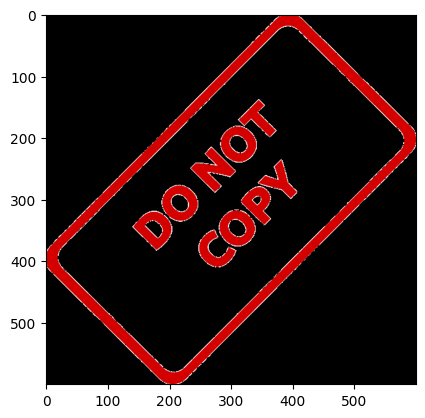

In [19]:
foreground_img = cv2.bitwise_or(img2,img2,mask= mask_inv)
plt.imshow(foreground_img)

In [20]:
final_roi = cv2.bitwise_or(roi,foreground_img)

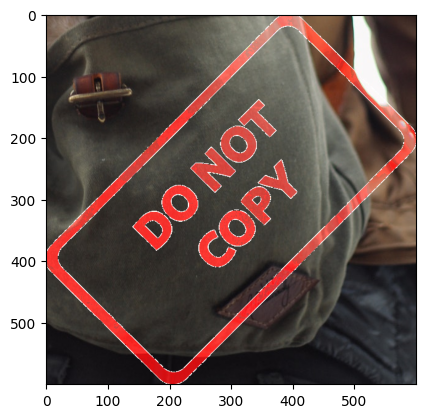

In [21]:
plt.imshow(final_roi)

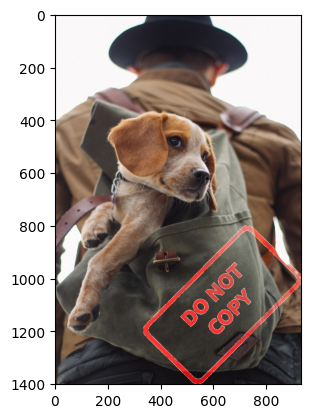

In [22]:
img1[y_offset:y_end, x_offset:x_end] = final_roi
plt.imshow(img1)